['smoke']
tensor([0.9660])


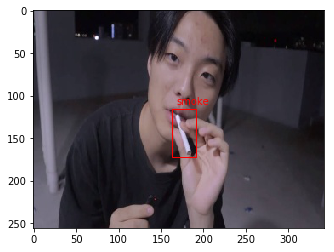

In [31]:
from detecto import core, utils, visualize
# import matplotlib.pyplot as plt

from torchvision import transforms
# # Convert XML files to CSV format
# utils.xml_to_csv('training_labels/', 'train_labels.csv')
# utils.xml_to_csv('validation_labels/', 'val_labels.csv')

# Define custom transforms to apply to your dataset
custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(saturation=0.3),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

# Pass in a CSV file instead of XML files for faster Dataset initialization speeds
# dataset = core.Dataset('train_labels.csv', 'images/', transform=custom_transforms)
# val_dataset = core.Dataset('val_labels.csv', 'val_img')  # Validation dataset for training

# loader = core.DataLoader(dataset, batch_size=2, shuffle=True) 

# model = core.Model(['knife', 'smoke', 'gun', 'adult'])
# losses = model.fit(loader, val_dataset, epochs=15, learning_rate=0.001, verbose=True)

# plt.plot(losses)  # Visualize loss throughout training
# plt.show()

# model.save('model_weights5.pth')  # Save model to a file

# # Directly access underlying torchvision model for even more control
# torch_model = model.get_internal_model()
# print(type(torch_model))

# augmentations = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.RandomHorizontalFlip(0.5),
#     transforms.ColorJitter(saturation=0.5),
#     transforms.ToTensor(),
#     utils.normalize_transform(),
# ])

# dataset = core.Dataset('images/', transform=custom_transforms)

# loader = core.DataLoader(dataset, batch_size=2, shuffle=True)
# model = core.Model(['smoke', 'knife', 'gun'])

# model.fit(dataset, epochs=15, learning_rate=0.001, verbose=True)
# model.save('model_weights6.pth')
model = core.Model.load('model_weights6.pth', ['smoke', 'knife', 'gun'])
image = utils.read_image('test/smoke_test/smoke_test1 (1).jpg')
prediction = model.predict(image)
labels, boxes, scores = prediction

print(labels)
print(scores)

visualize.show_labeled_image(image,boxes[0],labels[0])
